 Random Forest (RF)

importation of libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

loading of data

In [2]:
data = pd.read_csv('../dataset/heart.csv')

In [3]:
df = pd.get_dummies(data)


In [4]:
X = df.drop(['HeartDisease'], axis = 1)
y = df.HeartDisease

division of the model ino train and tet set

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

the random forest part

In [6]:

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [7]:

confusion_matrix(y_test, model.predict(X_test))



array([[104,  29],
       [ 14, 129]], dtype=int64)

In [8]:
classification_report(y_test, model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.83       133\n           1       0.82      0.90      0.86       143\n\n    accuracy                           0.84       276\n   macro avg       0.85      0.84      0.84       276\nweighted avg       0.85      0.84      0.84       276\n'

In [9]:
# Definition of hyperparameters
n_estimators = [int(x) for x in np.linspace(10, 30, 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 10]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
criterion = ['gini', 'entropy']
bootstrap = [True, False]

In [10]:
params_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'bootstrap': bootstrap
              }

In [11]:
list_best_param = []
list_best_scoores = []
for i in range(2, 4): 
    df_grid = GridSearchCV(estimator=model, param_grid= params_grid, cv= i)
    df_grid.fit(X_train, y_train)
    list_best_param.append(df_grid.best_params_)
    list_best_scoores.append(df_grid.best_score_)
    

In [12]:
print(list_best_param)
print(list_best_scoores)

[{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}, {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 16}]
[0.8878504672897196, 0.883177570093458]


In [13]:
pd.DataFrame(list_best_scoores, index = range(2,4), 
            columns = ['Best score']).sort_index()

,Best score
2,0.887850
3,0.883178


In [14]:
best_score_index = 0
for i in list_best_scoores:
    if i > i+1:
        best_score_index = i.index


In [15]:
list_best_param[best_score_index]

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [40]:
def best_param_for_Random_Forest(number_cv=2):
    n_estimators = [int(x) for x in np.linspace(10, 20, 10)]
    max_features = ['auto', 'sqrt']
    max_depth = [2, 10]
    min_samples_split = [2, 5]
    min_samples_leaf = [1, 2]
    criterion = ['gini', 'entropy']
    bootstrap = [True, False]
    params_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'bootstrap': bootstrap
              }
    # grid sarch
    list_best_param = []
    list_best_scores = []
    list_best_test_scores = []
    indexs = [i for i in range(2, number_cv+1)]
    for i in range(2, number_cv+1):   
        df_grid = GridSearchCV(estimator=model, param_grid= params_grid, cv= i)
        df_grid.fit(X_train, y_train)
        list_best_param.append(df_grid.best_params_)
        list_best_scores.append(df_grid.best_score_)
        list_best_test_scores.append(df_grid.score(X_test, y_test))
# crate a data frame with the cv and the bst score
    print(pd.DataFrame(list_best_scores, index = range(2, number_cv+1), 
            columns = ['Best score']).sort_values(by=['Best score'], ascending= False))
  

# # best score
    best = max(list_best_scores)
    print('best score: ',best)
# give the bst params
    print('best params are : ',list_best_param[list_best_scores.index(best)])
    
    plt.plot(indexs, list_best_scores, label="train best score")
    plt.plot(indexs, list_best_test_scores, label="test score")
    plt.ylabel("score")
    plt.xlabel("cv")
    plt.legend()

   Best score
3    0.884735
2    0.883178
5    0.880039
4    0.878465
best score:  0.8847352024922118
best params are :  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 15}


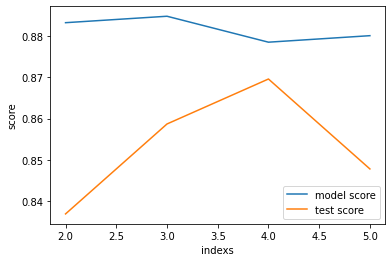

In [39]:
best_param_for_Random_Forest(number_cv = 5)

In [ ]:
# plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
# plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
# plt.ylabel("Accuracy") 
# plt.xlabel("n_neighbors") 
# plt.legend() 